# Proyek Machine Learning - Water Quality Classification


# Data Diri

- Nama : Faisal Ahmad Gifari
- Jenis Kelamin : Laki-Laki
- Pekerjaaan : Mahasiswa
- Tempat/Tanggal Lahir : Kuningan, 17 September 2002
- Username : faisal_ag_037
- email : pd-20379543@edu.jakarta.go.id
- No. Telepon : 085775063559
- Kota Domisili : Jakarta Barat
- Institusi : UIN Syarif Hidayatullah Jakarta


# Importing Library

In [ ]:
# Meng-import semua library yang digunakan
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import missingno as msno
import warnings
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

# Importing Dataset

In [ ]:
# Install kaggle package
!pip install kaggle

# Upload kaggle.json yang didapatkan dari akun Kaggle
from google.colab import files
files.upload()  # Pilih file kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"faisalahmadgifari","key":"ed64085bcca63a89919ce8f63a9b5464"}'}

In [ ]:
# Buat direktori dan ubah izin file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d uom190346a/water-quality-and-potability

# Unzip dataset dan hapus file zip
!unzip water-quality-and-potability.zip && rm water-quality-and-potability.zip

  0% 0.00/251k [00:00<?, ?B/s]
100% 251k/251k [00:00<00:00, 92.5MB/s]
Archive:  water-quality-and-potability.zip
  inflating: water_potability.csv    


Dataset sudah diimport dan sudah diekstrak

In [ ]:
# Membuat dataset menjadi dataframe dengan nama 'dataset'
dataset = pd.read_csv('//content//water_potability.csv')

In [ ]:
# Preview dataframe dari dataset yang sudah dibuat
dataset

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

Dataframe berhasil dibuat dengan nama ```dataset```

# Data Understanding

_Dataset_ yang digunakan untuk pembangunan model _machine learning_ ini adalah _dataset_ "Water Quality and Potability" yang tersedia di situs web [Kaggle](https://www.kaggle.com/). _Dataset_ tersebut adalah _dataset_ kuantitatif yang berisi kolom-kolom yang dapat menentukan sebuah kualitas air layak diminum atau tidak. _Dataset_ ini memiliki 3276 baris dan 10 kolom data.

_Dataset_ ini cocok untuk membangun model _supervised learning_, khususnya _binary classification_. Dalam kasus ini adalah untuk mengklasifikasinya sampel sebuah air layak diminum (_Potable_) atau tidak layak diminum (_Not Potable_)

_Dataset_ tersebut dapat diunduh [disini](https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability).

Berikut ini adalah informasi lainnya mengenai variabel-variabel yang terdapat di dataset tersebut:

Variabel-variabel pada _Dataset "Water Quality and Potability"_ adalah sebagai berikut:
- ```pH```: Tingkat pH air.
- ```Hardness```: Ukuran kandungan mineral.
- ```Solids```: Total padatan terlarut dalam air.
- ```Chloramines```: Konsentrasi kloramin dalam air.
- ```Sulfate```: Konsentrasi sulfat dalam air.
- ```Conductivity```: Konduktivitas listrik di air.
- ```Organic_carbon```: Kandungan karbon organik dalam air.
- ```Trihalomethanes```: Konsentrasi trihalometan dalam air.
- ```Turbidity```: Tingkat kekeruhan, ukuran kejernihan air.
- ```Potability```: Variabel target. menunjukkan potabilitas air dengan nilai 1 (layak minum) dan 0 (tidak layak minum).


## Exploratory Data Analysis

Exploratory Data Analysis (EDA) adalah pendekatan analisis data yang bertujuan untuk memahami karakteristik utama dari kumpulan data. EDA melibatkan penggunaan teknik statistik dan visualisasi grafis untuk menemukan pola, hubungan, atau anomali untuk membentuk hipotesis. Proses ini sering kali tidak terstruktur dan dianggap sebagai langkah awal penting dalam analisis data yang membantu menentukan arah analisis lebih lanjut.

In [ ]:
# Menampilan jumlah baris dan kolom yang ada pada dataset

dataset.shape

(3276, 10)

Berdasarkan output diatas, didapatkan informasi:
  - Terdapat 3276 baris data
  - Tedapat 10 kolom

In [ ]:
# Menampilkan kolom-kolom yang ada pada dataset

dataset.keys()

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

Berdasarkan output diatas, didapatkan informasi:

Dataset memiliki 10 kolom, yaitu 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'

 terdiri dari 1 kolom label ("Potability") 9 kolom feature (sisanya selain kolom label)

In [ ]:
# Menampilkan tipe data dari setiap kolom yang ada

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Berdasarkan hasil diatas, didatkan informasi:
- Kolom ```Potability``` memiliki tipe data ```int64```
- Kolom lainnya memiliki tipe data ```float64```

In [ ]:
# Menampilkan statistika deskriptif unuk setiap kolom

dataset.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

Fungsi diatas memberikan informasi statistika deskriptif untuk setiap kolom yang ada, yaitu:
- ```count``` : Jumlah data dari sebuah kolom
- ```mean``` : Rata-rata dari sebuah kolom
- ```std``` : Standar deviasi dari sebuah kolom
- ```min``` : Nilai terendah pada sebuah kolom
- ```25%``` : Nilai kuartil pertama (Q1) dari sebuah kolom
- ```50%``` : Nilai kuartil kedua (Q2) atau median atau nilai tengah dari sebuah kolom
- ```75%``` : Nilai kuartil ketiha (Q3) dari sebuah kolom
- ```max``` : Nilai tertinggi pada sebuah kolom

In [ ]:
# Menjumlah total missing value pada dataset

dataset.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Berdasarkan output diatas, terdapat 3 kolom yang memiliki missing value dengan jumlah yang berbeda. Kolom tersebut yaitu:
- ```ph```
- ```Sulfate```
- ```Trihalomethanes```

## Data Visualization

### Univariate Analysis


Univariate Analysis adalah jenis analisis data yang memeriksa satu variabel (atau bidang data) pada satu waktu. Tujuannya adalah untuk menggambarkan data dan menemukan pola yang ada dalam distribusi variabel tersebut. Ini termasuk penggunaan statistik deskriptif, histogram, dan box plots untuk menganalisis distribusi dan memahami sifat dari variabel tersebut.

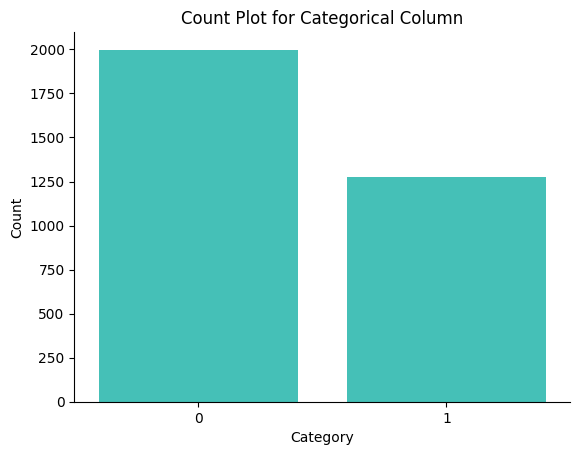

In [ ]:
# Membuat count plot
sns.countplot(x='Potability', data=dataset, color='#30D5C8')
sns.despine()
plt.title('Count Plot for Categorical Column')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Berdasarkan *count_plot* diatas, didapatkan informasi bahwa:
- kelas `0` pada label `Potability` memiliki nyaris 2000 data.
- kelas `1` pada label `Potability` hanya memiliki sekitar 1250 data.

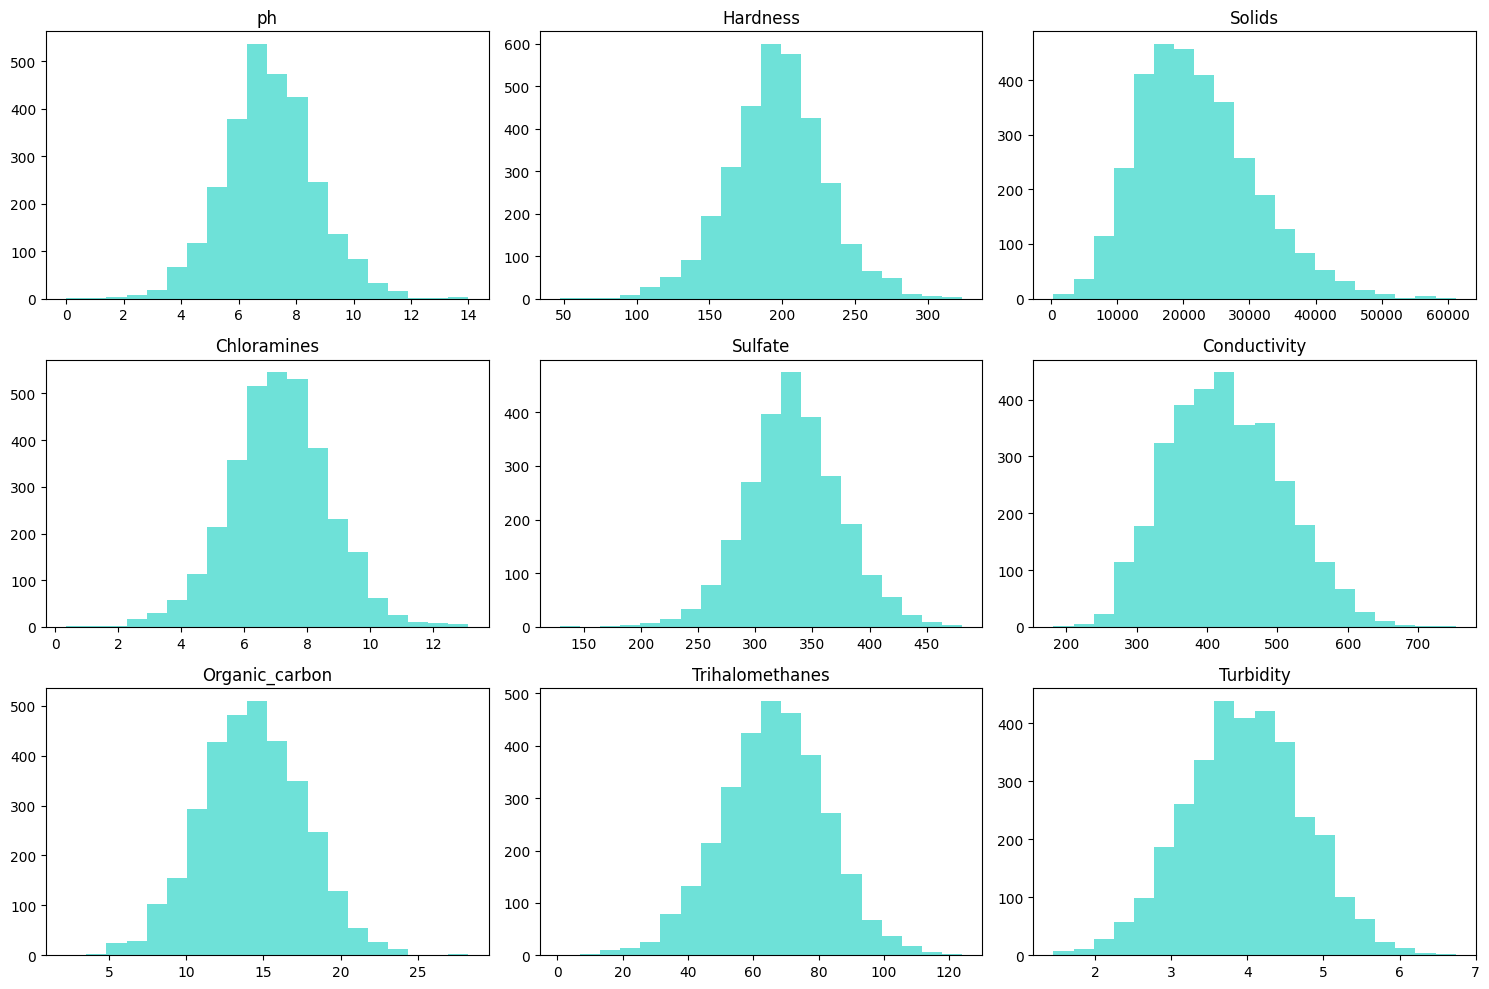

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
axs = axs.flatten()

# Memilih hanya 9 kolom numerikal pertama
numerical_columns = dataset.select_dtypes(include=['float64']).columns[:9]

for i, column in enumerate(numerical_columns):
    axs[i].hist(dataset[column], bins=20, color= '#30D5C8', alpha=0.7)
    axs[i].set_title(column)

# Menghapus subplot yang tidak digunakan
if len(numerical_columns) < len(axs):
    for i in range(len(numerical_columns), len(axs)):
        fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

Berdasarkan visualisasi diatas, gambar ini menampilkan setiap kolom numerik yang ada pada dataset, seperti ```pH```, ```Hardness```, ```Solids```, ```Chrolamines```, ```Sulfate```, ```Conductivity```, ```Organic_carbon```, ```Trihalomethanes```, ```Turbidity```. Dari semua kolom yang ditampilkan, hanya kolom ```Solids``` dan ```Conductivity``` yang memiliki skewness ke arah kiri.

### Multivariate Analysis

_Multivariate Analysis_ adalah prosedur statistik yang digunakan untuk memeriksa hubungan antara beberapa variabel secara bersamaan. Teknik ini mencakup berbagai metode seperti regresi berganda, analisis faktor, dan analisis kluster, yang membantu dalam memahami struktur dan pola yang kompleks dalam data dengan lebih dari satu variabel.

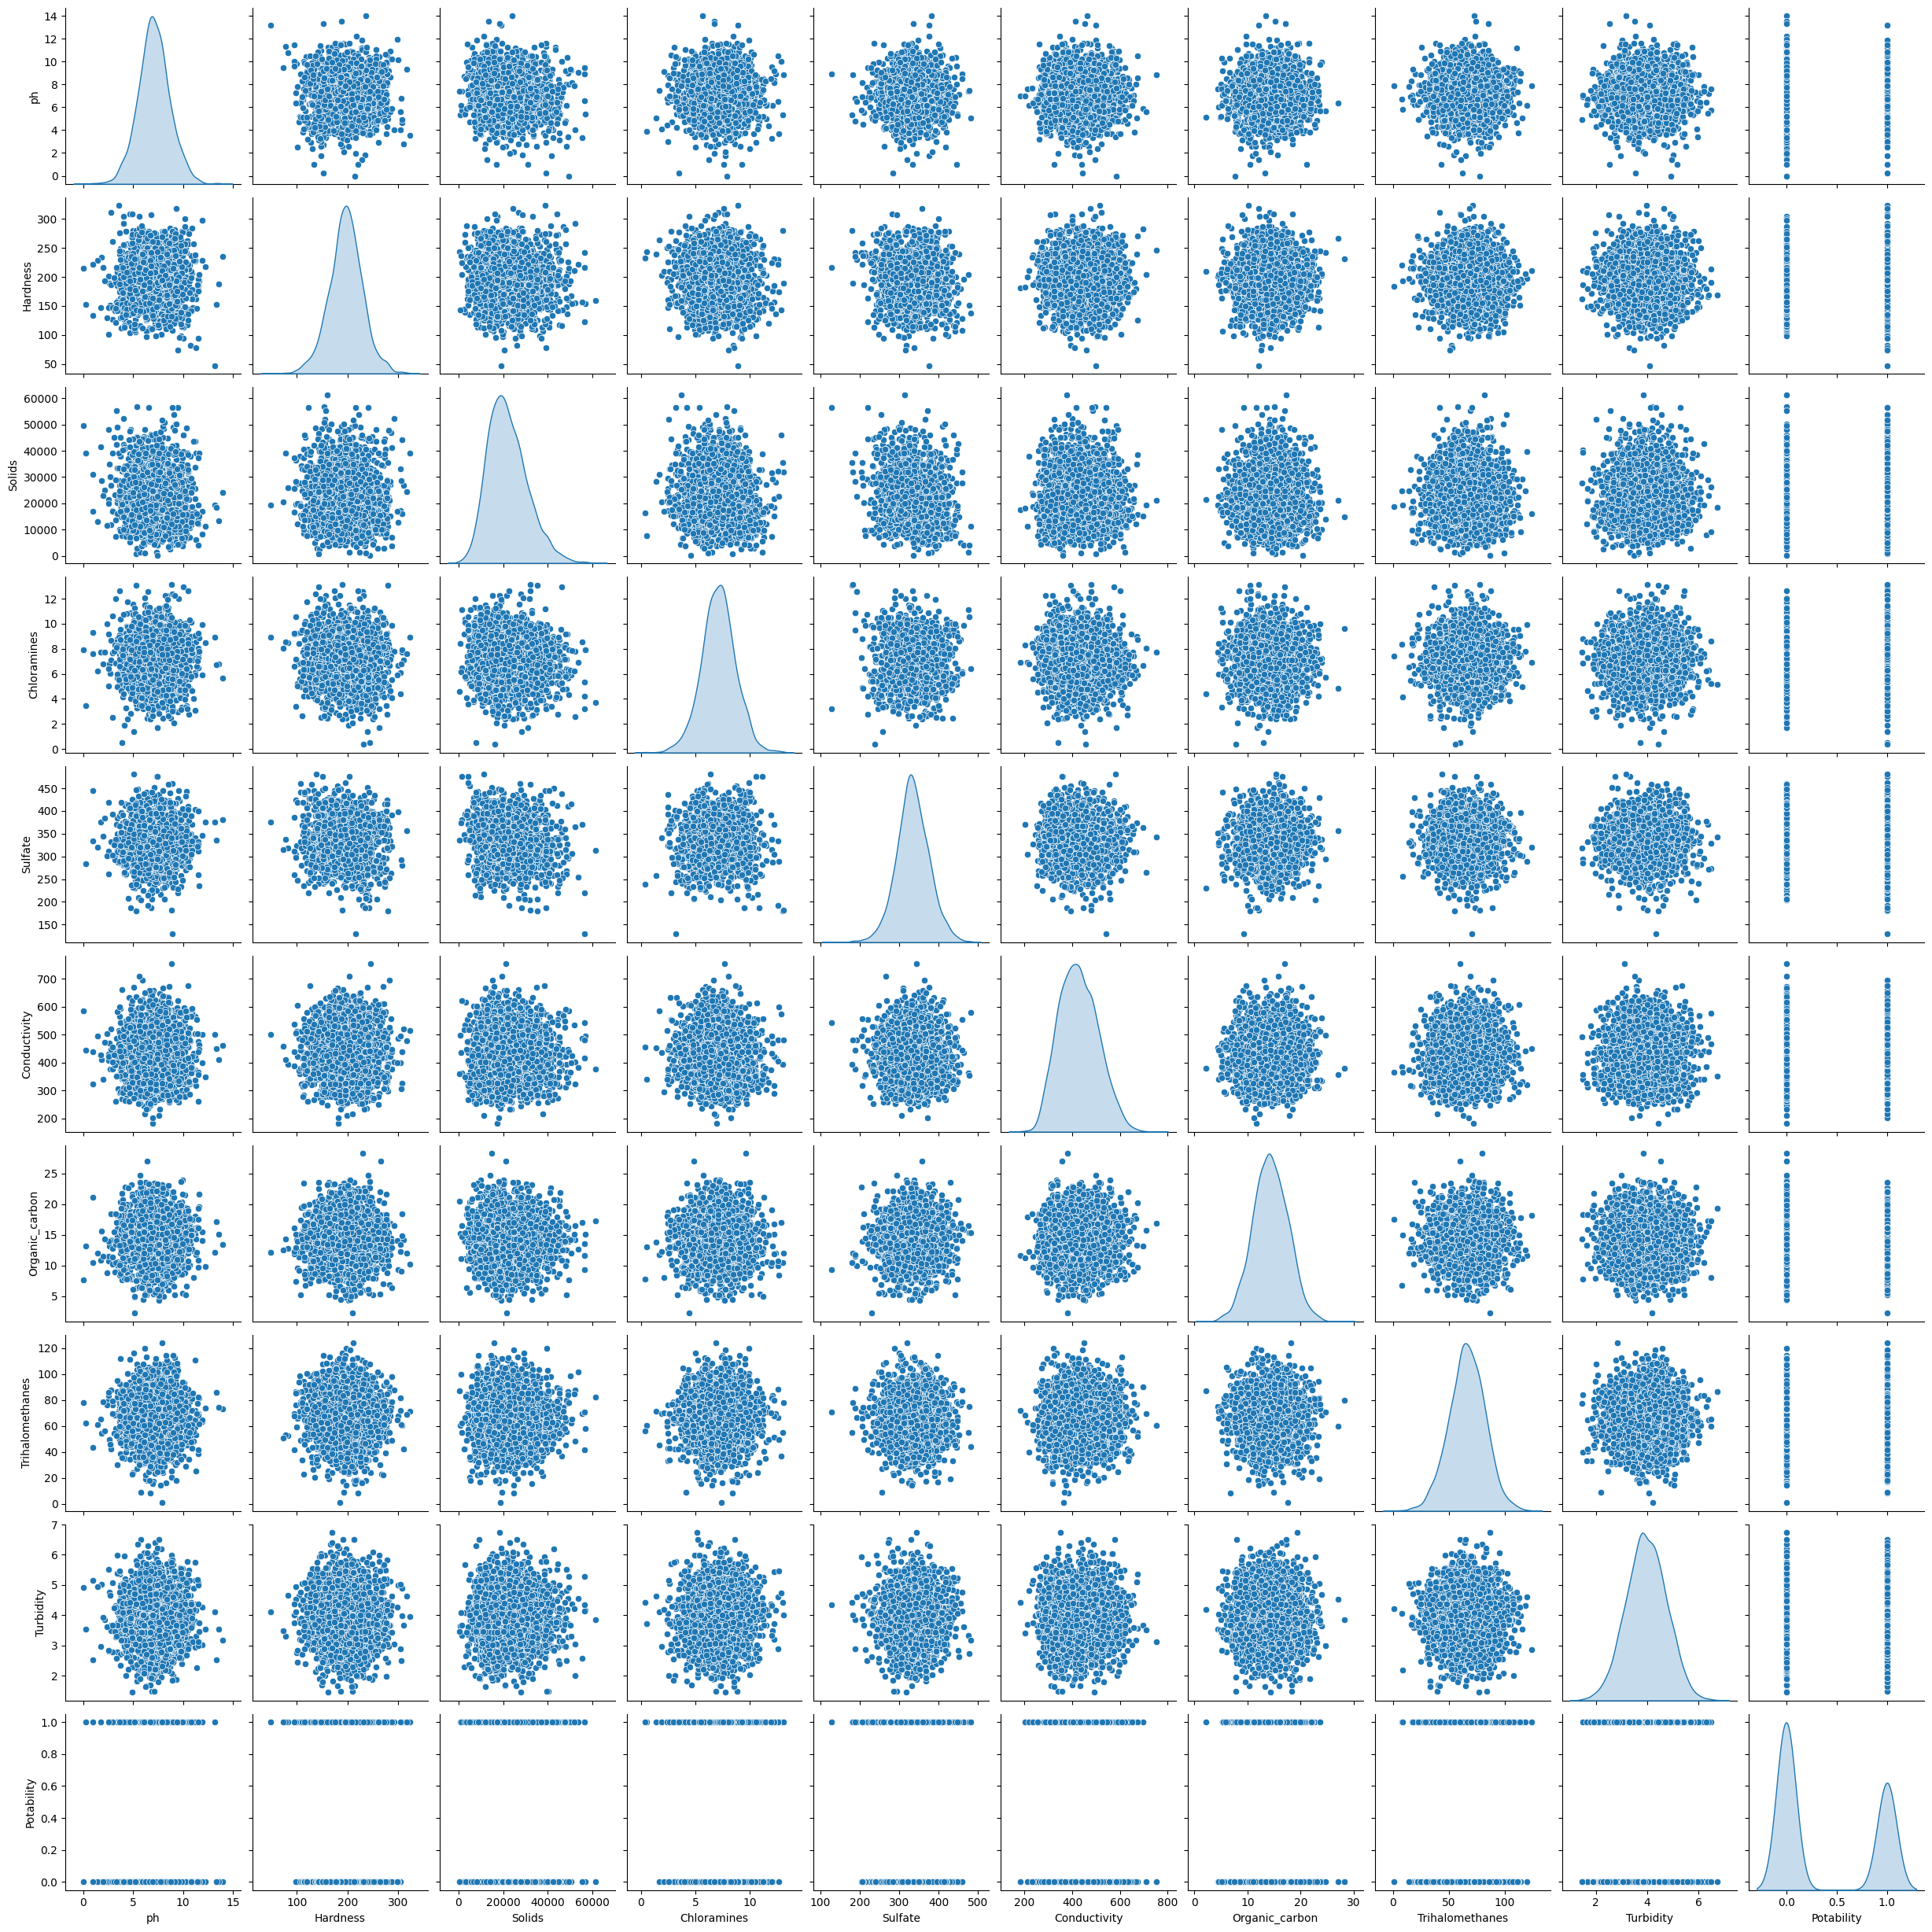

In [ ]:
sns.pairplot(dataset, diag_kind = 'kde')

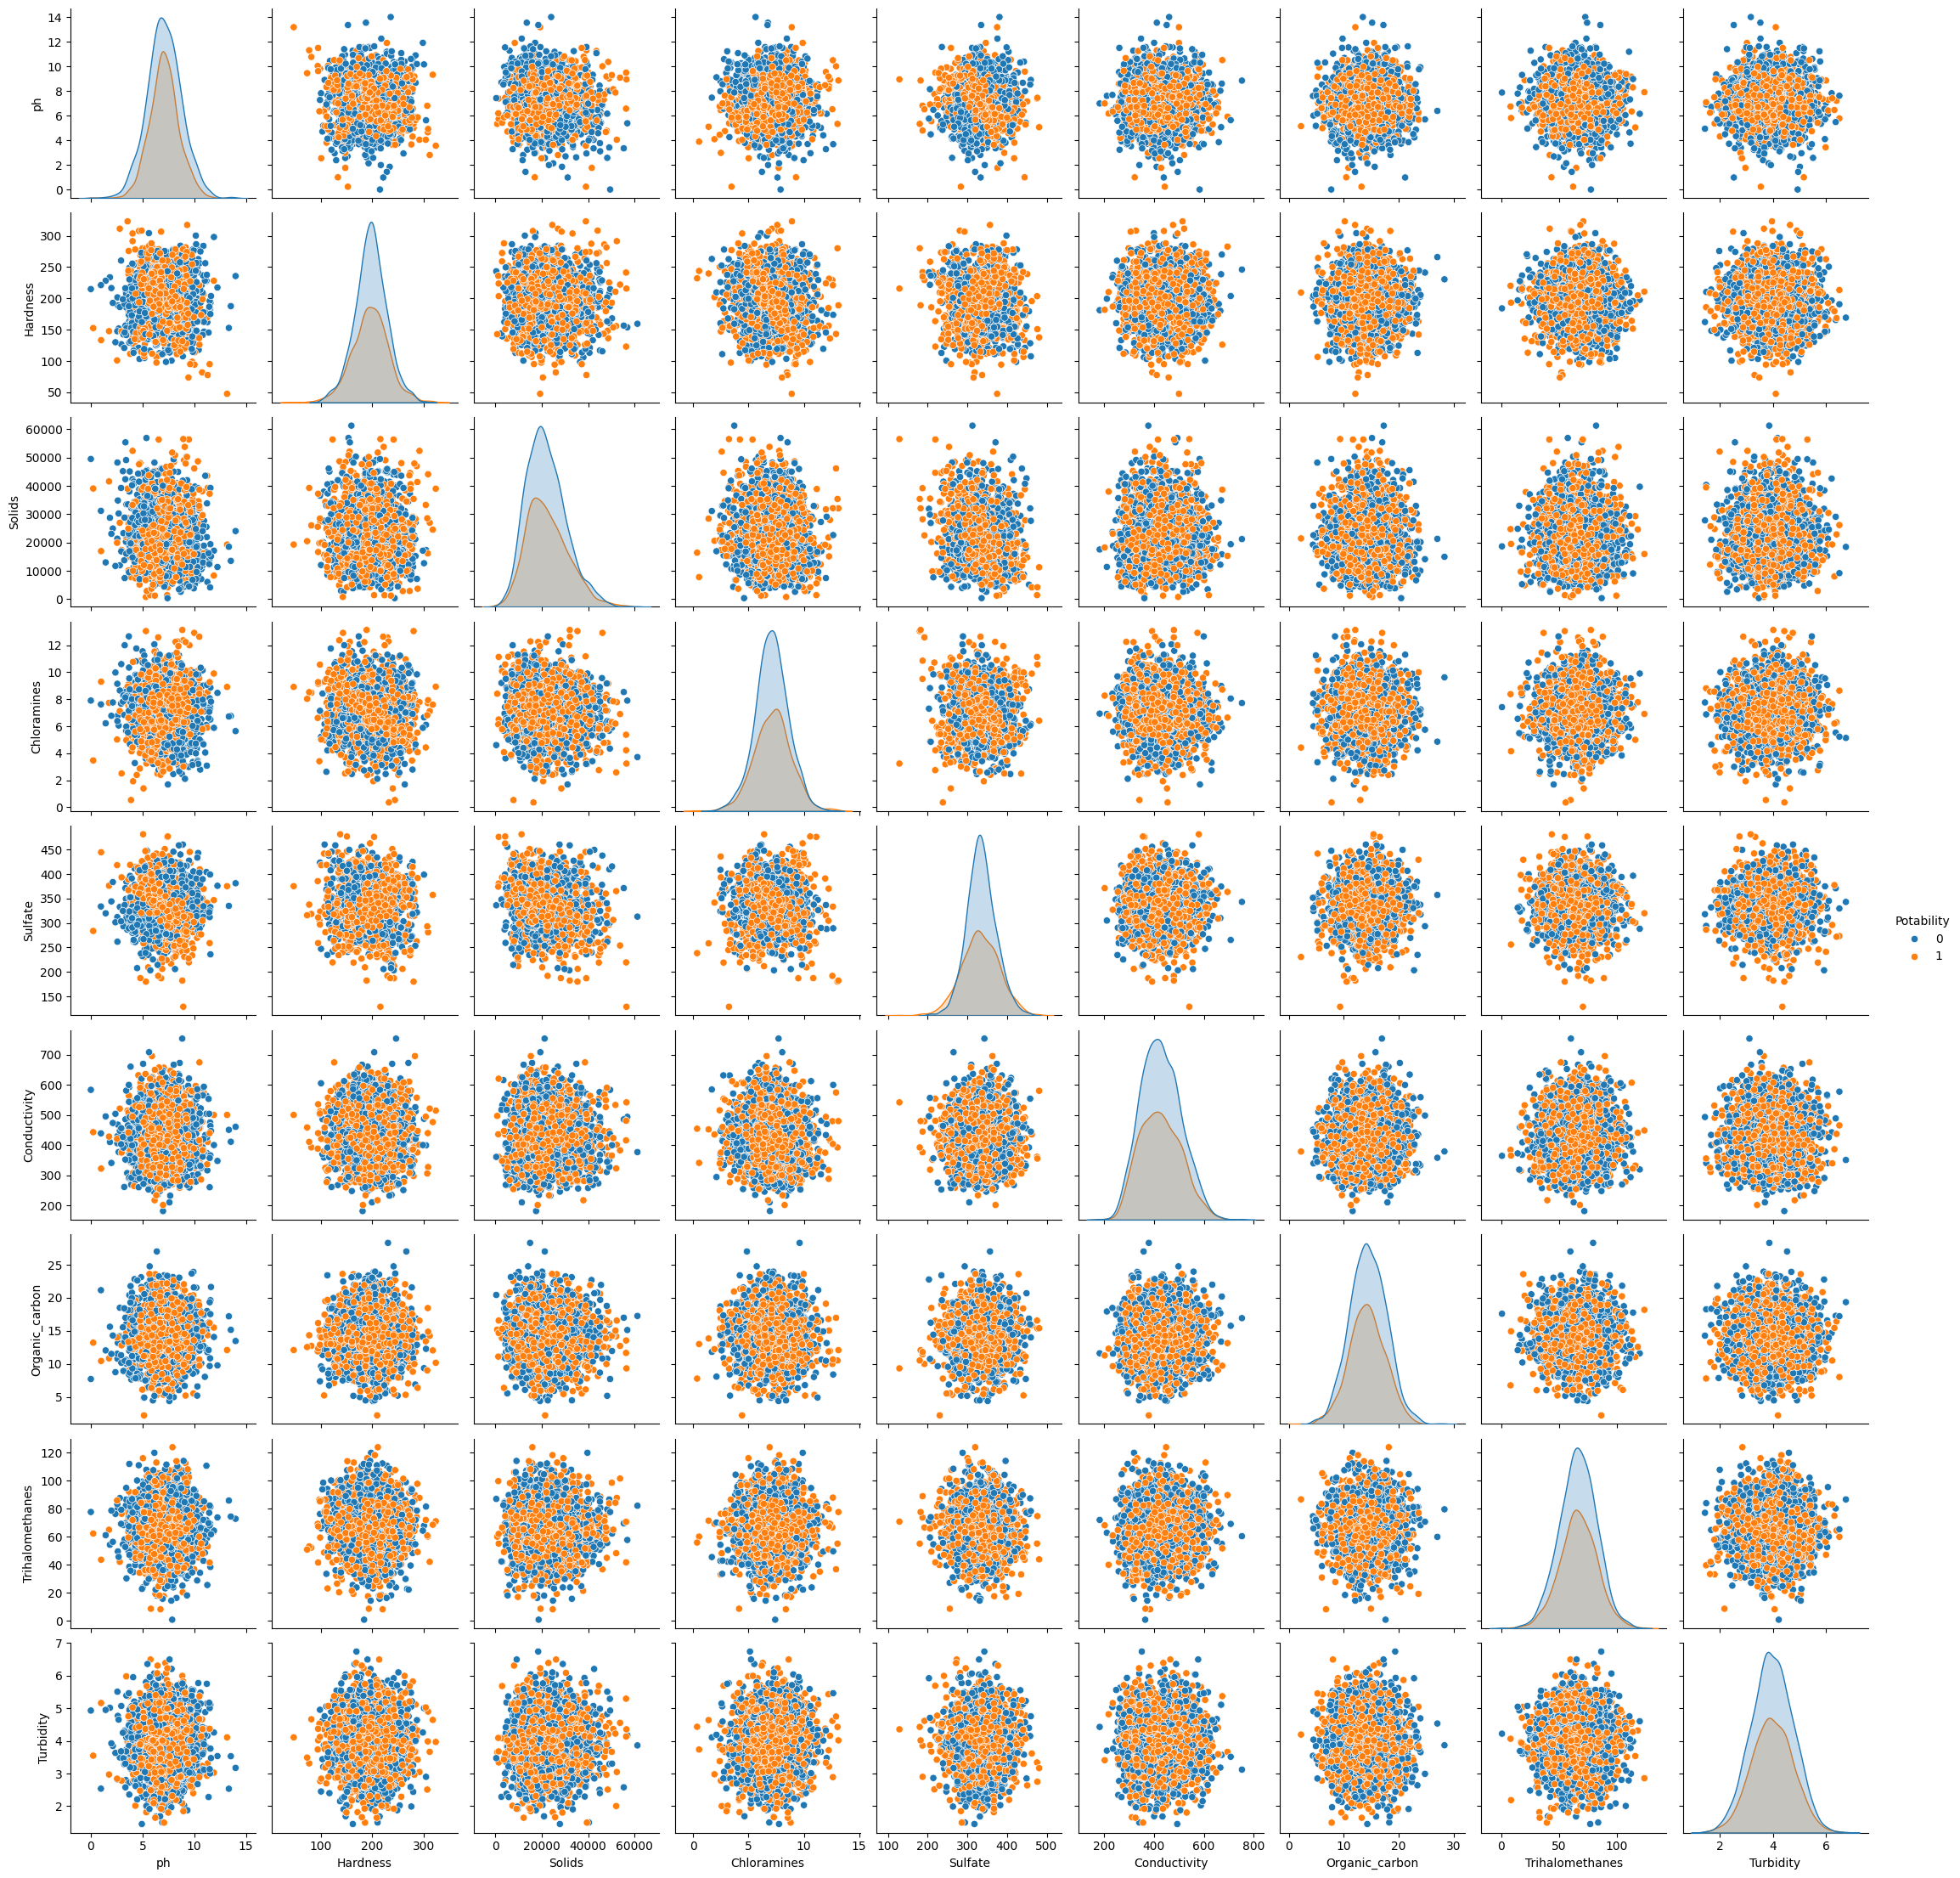

In [ ]:
sns.pairplot(dataset, diag_kind = 'kde', hue="Potability")

Berdasarkan gambar kedua visualisasi data diatas, dapat terlihat nyaris semua variabel berkumpul di tengah dan tidak menunjukkan karakteristik atau pola khusus terhadap variabel label, yaitu ```'Potability'```. Bahkan, pada ```Gambar 2b``` sekalipun yang sudah di kategorikan berdasarkan ```0``` dan ```1``` (ditandai dengan warna oren dan biru) masih tidak terlihat karakterisik atau pola untuk _value_ pada label tertentu. Kejadian ini mengindikasikan rendahnya korelasi antar fitur, bahkan dengan variabel label sekalipun.


### Correlation

Uji Korelasi adalah metode statistik yang digunakan untuk menentukan apakah ada hubungan antara dua variabel kuantitatif dan seberapa kuat hubungan tersebut. Uji ini menghasilkan nilai koefisien korelasi, seperti Pearson atau Spearman, yang berkisar antara -1 hingga +1. Nilai mendekati +1 menunjukkan korelasi positif yang kuat, sedangkan nilai mendekati -1 menunjukkan korelasi negatif yang kuat. Nilai mendekati 0 menunjukkan tidak adanya korelasi. Uji korelasi penting dalam menentukan arah dan kekuatan hubungan antar variabel, yang dapat membantu dalam pemodelan prediktif dan analisis penyebab.

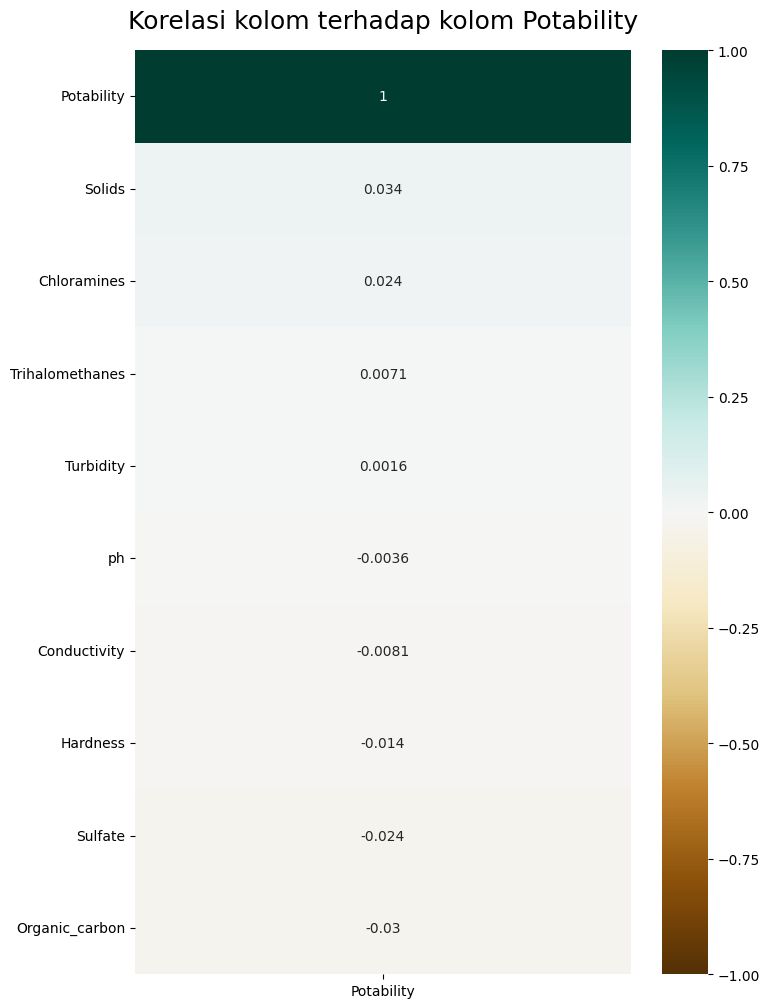

In [ ]:
# Melakukan visualisasi uji korelasi kolom numeric terhadap kolom label

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dataset.corr()[['Potability']].sort_values(by='Potability', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Korelasi kolom terhadap kolom Potability', fontdict={'fontsize':18}, pad=16);

Berdasarkan  visualisasi diatas, terlihat bahwa kolom ```pH```, ```Conductivity```, ```Trihalomethanes```, ```Turbidity``` memiliki skor korelasi yang paling kecil terhadap label. Kolom yang semacam ini baiknya di-drop saja untuk meringankan beban komputasi dan mengurangi dimensi dari dataset yang akan digunakan dalam pelatihan model

### Missing Value

_Missing Values_ adalah data yang hilang atau tidak tercatat dalam dataset. Hal ini bisa terjadi karena berbagai alasan, seperti kesalahan entri data, kerusakan data, atau tidak tersedianya informasi saat pengumpulan data. Missing values dapat mempengaruhi kualitas model _machine learning_ dan hasil analisis statistik. Oleh karena itu, penting untuk mengidentifikasi, menganalisis, dan mengatasi missing values dengan metode seperti imputasi, di mana nilai yang hilang diganti dengan estimasi, atau dengan menghapus baris atau kolom yang terdampak.


<Axes: >

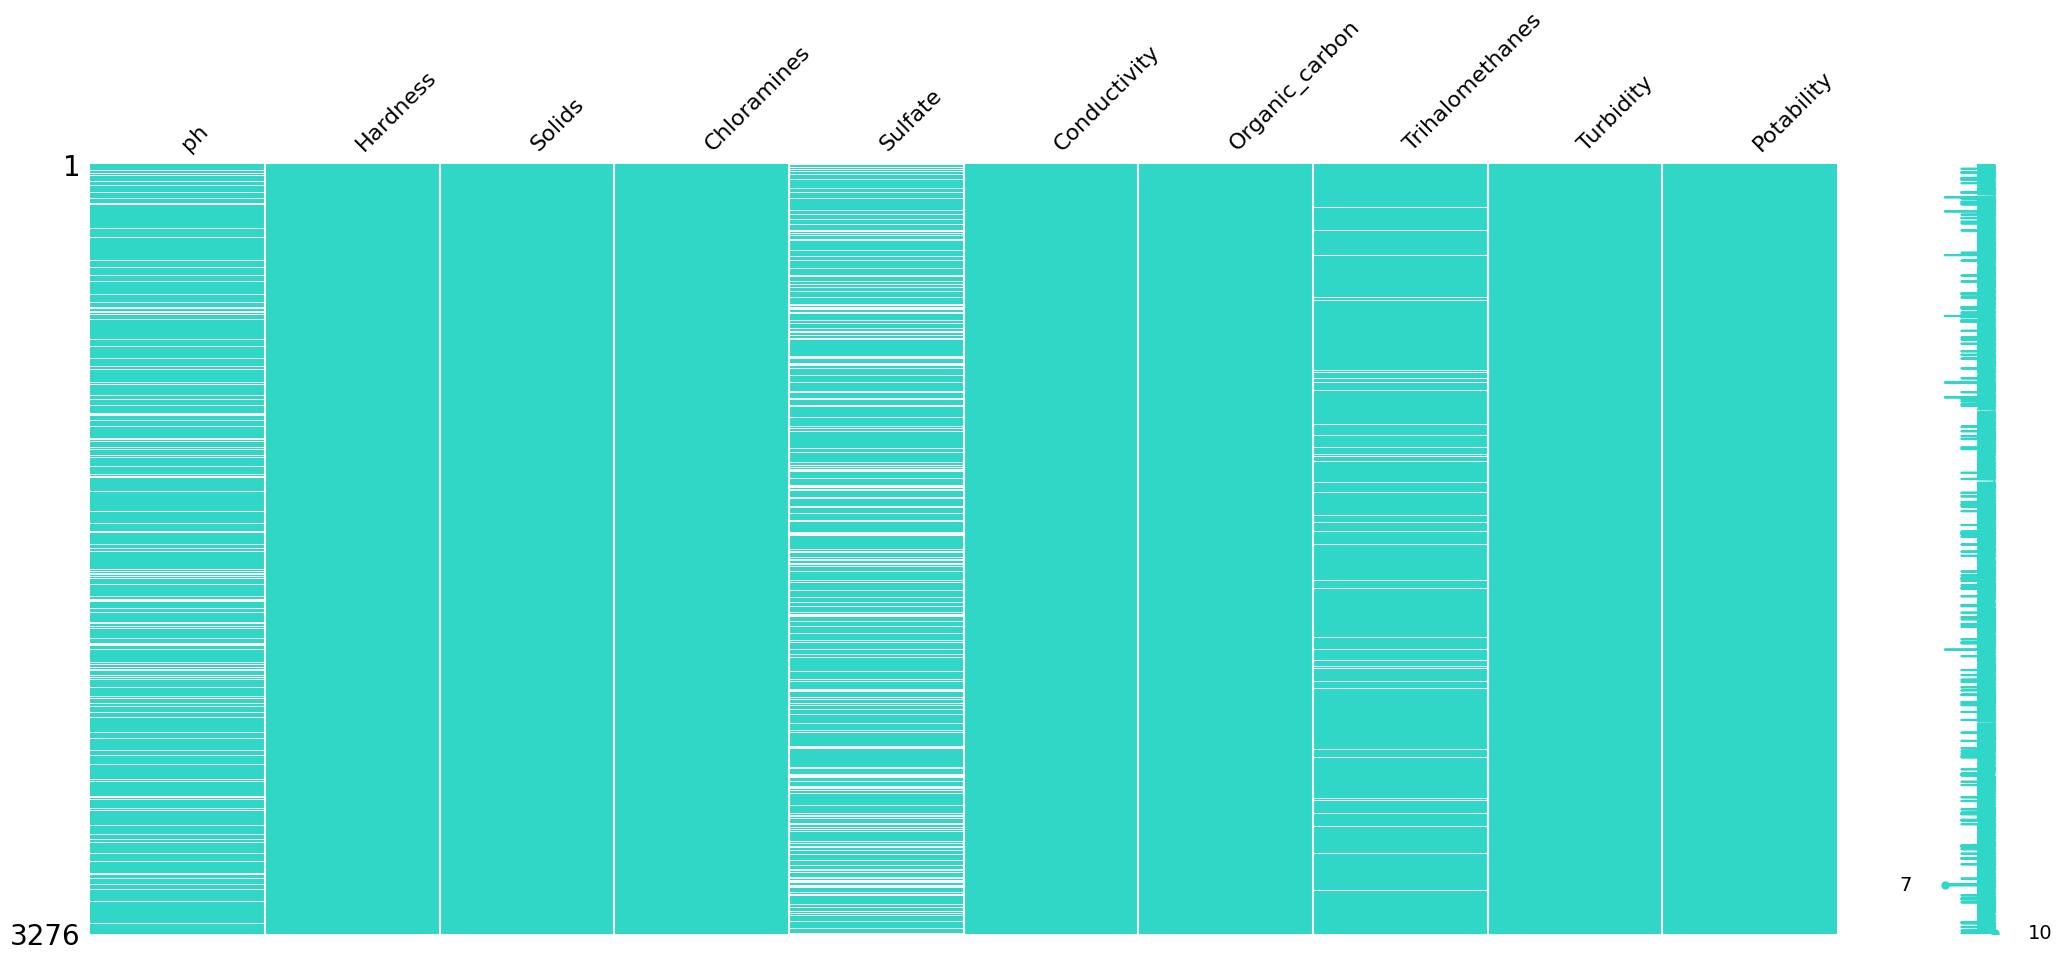

In [ ]:
# Melakukan visualisasi missing value pada setiap kolom

msno.matrix(dataset, color=(0.19, 0.84, 0.78))

Berdasarkan visualisasi data diatas, didapatkan informasi bahwa:
-  Terdapat 3 kolom yang memiliki *missing value*
- Kolom tersebut yaitu, `ph`, `Sulfate`, dan `Trihalomethanes`

# Data Preparation

## Data Cleaning

Data cleaning_ adalah adalah langkah penting dalam proses Machine Learning karena melibatkan identifikasi dan penghapusan data yang hilang, duplikat, atau tidak relevan yang terdapat pada dataset. Proses ini memiliki berbagai langkah yang perlu dilakukan supaya dataset siap digunakan untuk pembangunan model Machine Learning.

**Alasan**: _Data Cleaning_ diperlukan agar data yang digunakan akurat, konsisten, dan bebas kesalahan, karena data yang salah atau tidak konsisten dapat berdampak negatif terhadap performa model Machine Learning

### Detection and Removal Duplicates

Data duplikat adalah baris data yang sama persis untuk setiap variabel yang ada. Dataset yang digunakan perlu diperiksa juga apakah dataset memiliki data yang sama atau data duplikat. Jika ada, maka data tersebut harus ditangani dengan menghapus data duplikat tersebut.

**Alasan**: Data duplikat perlu didektesi dan dihapus karena jika dibiarkan pada dataset dapat membuat model Anda memiliki bias, sehingga menyebabkan _overfitting_. Dengan kata lain, model memiliki performa akurasi yang baik pada data pelatihan, tetapi buruk pada data baru. Menghapus data duplikat dapat membantu memastikan bahwa model Anda dapat menemukan pola yang ada lebih baik lagi.

In [ ]:
# Cek baris duplikat dalam dataset
duplicates = dataset.duplicated()

# Hitung jumlah baris duplikat
duplicate_count = duplicates.sum()

# Cetak jumlah baris duplikat
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


Berdasarkan hasil tersebut, tidak ditemukan adanya data duplikat, maka tidak ada juga proses penghapusannya.

### Dropping Column with Low Correlation

ada bagian ini adalah proses penghapusan fitur-fitur yang memiliki korelasi rendah terhadap variabel target dari dataset. Langkah ini diambil berdasarkan asumsi bahwa fitur dengan korelasi rendah tidak memberikan kontribusi signifikan terhadap prediksi yang dibuat oleh model.

**Alasan**: Tahapan ini perlu dilakukan karena fitur dengan korelasi rendah terhadap variabel target cenderung tidak memberikan informasi yang berguna untuk prediksi dan dapat menambahkan kebisingan yang tidak perlu ke dalam model. Dengan menghilangkan fitur-fitur ini, kita dapat mengurangi kompleksitas model, yang dapat membantu dalam mencegah _overfitting_ dan mempercepat waktu pelatihan. Selain itu, model yang lebih sederhana dengan fitur yang lebih sedikit lebih mudah untuk diinterpretasikan, yang memungkinkan kita untuk lebih memahami bagaimana fitur-fitur tersebut mempengaruhi variabel target.


In [ ]:
# Mendefinisikan daftar fitur dengan korelasi rendah terhadap variabel target
low_corr = ['ph', 'Trihalomethanes', 'Turbidity', 'Conductivity']

# Menghapus fitur-fitur tersebut dari dataset
# Axis=1 menunjukkan bahwa operasi penghapusan dilakukan pada kolom (fitur)
dataset = dataset.drop(low_corr, axis=1)


In [ ]:
dataset

Hardness        Solids  Chloramines     Sulfate  Organic_carbon  \
0     204.890455  20791.318981     7.300212  368.516441       10.379783   
1     129.422921  18630.057858     6.635246         NaN       15.180013   
2     224.236259  19909.541732     9.275884         NaN       16.868637   
3     214.373394  22018.417441     8.059332  356.886136       18.436524   
4     181.101509  17978.986339     6.546600  310.135738       11.558279   
...          ...           ...          ...         ...             ...   
3271  193.681735  47580.991603     7.166639  359.948574       13.894419   
3272  193.553212  17329.802160     8.061362         NaN       19.903225   
3273  175.762646  33155.578218     7.350233         NaN       11.039070   
3274  230.603758  11983.869376     6.303357         NaN       11.168946   
3275  195.102299  17404.177061     7.509306         NaN       16.140368   

      Potability  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
3271           1  
3272           1  
3273           1  
3274           1  
3275           1  

[3276 rows x 6 columns]

Penghapusan kolom dengan korelasi rendah sudah berhasil dilakukan. Berdasarkan dataframe diatas, tersisa 6 kolom. 1 kolom label dan 5 kolom numerik.

### Handle Missing Value

_Missing Value_ terjadi ketika variabel atau barus tertentu kekurangan titik data, sehingga menghasilkan informasi yang tidak lengkap. Nilai yang hilang dapat ditangani dengan berbagai cara seperti imputasi (mengisi nilai yang hilang dengan mean, median, modus, dll), atau penghapusan (menghilangkan baris atau kolom yang nilai hilang)

**Alasan**: _Missing Value_ perlu ditangani karena jika dibiarkan dapat berpengaruh ke rendahnya akurasi model yang akan dibuat. Maka dari itu, penting untuk mengatasi missing value secara efisien untuk mendapatkan model _Machine Learning_ yang baik juga.

In [ ]:
dataset.isnull().sum()

Hardness            0
Solids              0
Chloramines         0
Sulfate           781
Organic_carbon      0
Potability          0
dtype: int64

Berdasarkan output diatas, tersisa kolom `Sulfate` yang memiliki missing value sebanyak 781 baris data.

In [ ]:
dataset.dropna(inplace =True)

Setiap baris yang memiliki missing value, dihapus dari dataframe dan sudah berhasil dihapus.

In [ ]:
dataset.shape

(2495, 6)

Berdasarkan output diatas, kini dataframe memiliki:
- 6 Kolom
- 2495 baris data

### Outliers Detection and Removal


_Outliers_ adalah titik data yang secara signifikan berbeda dari sebagian besar data dalam kumpulan data. Outliers dapat muncul karena variasi dalam pengukuran atau mungkin menunjukkan kesalahan eksperimental; dalam beberapa kasus, outliers bisa juga menunjukkan variabilitas yang sebenarnya dalam data. Penting untuk menganalisis outliers karena mereka dapat memiliki pengaruh besar pada hasil analisis statistik.

Outliers adalah titik data yang secara signifikan berbeda dari sebagian besar data dalam kumpulan data. Outliers dapat muncul karena variasi dalam pengukuran atau mungkin menunjukkan kesalahan eksperimental; dalam beberapa kasus, outliers bisa juga menunjukkan variabilitas yang sebenarnya dalam data. Penting untuk menganalisis outliers karena mereka dapat memiliki pengaruh besar pada hasil analisis statistik.

Proses pembersihan outliers menggunakan metode IQR (Interquartile Range) melibatkan beberapa langkah:

- Menghitung Kuartil: Tentukan kuartil pertama (Q1) dan kuartil ketiga (Q3) dari data. Kuartil ini membagi data menjadi empat bagian yang sama.

- Menghitung IQR: Hitung IQR dengan mengurangi Q1 dari Q3:
  $$IQR=Q3−Q1$$

- Menentukan Batas Outliers:

  - Batas bawah untuk outliers:
    $$Q1−1.5×IQR$$

  - Batas atas untuk outliers:
    $$Q3+1.5×IQR$$

- Identifikasi Outliers: Data yang berada di luar batas bawah dan atas ini dianggap sebagai outliers.

Pembersihan Outliers yang teridentifikasi kemudian dapat dibersihkan dari dataset, baik dengan menghapusnya atau melakukan transformasi tertentu.
    
**Alasan**:_Outliers_ perlu dideteksi dan dihapus karena jika dibiarkan dapat merusak hasil analisis statistik pada kumpulan data sehingga menghasilkan performa model yang kurang baik. Selain itu, Mendeteksi dan menghapus _outlier_ dapat membantu meningkatkan performa model _Machine Learning_ menjadi lebih baik.

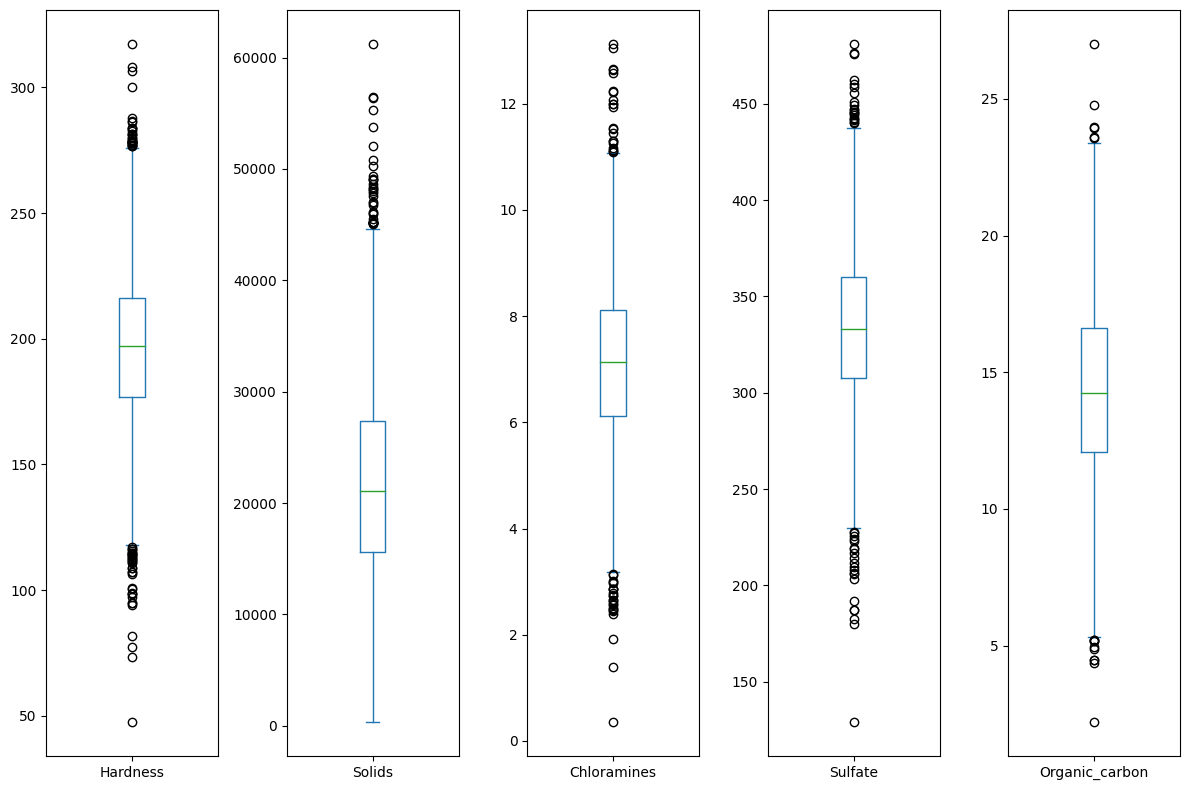

In [ ]:
feature_columns = dataset.select_dtypes(include=[np.number]).drop('Potability', axis=1)

feature_columns.plot(kind='box', subplots=True, layout=(1, len(feature_columns.columns)), figsize=(12, 8))
plt.tight_layout()
plt.show()

Berdasarkan boxplots diatas, semua kolom numerik memiliki outliers-nya masing-masing. Outliers perlu dihapus untuk mendapatkan model dengan performa yang bagus.

In [ ]:
# Assuming 'df' is your DataFrame
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for what is considered an outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
dataset = dataset[~((dataset < lower_bound) | (dataset > upper_bound)).any(axis=1)]


Outliers yang berada pada setiap kolom sudah dihapus.

In [ ]:
dataset.shape

(2314, 6)

Berdasarkan output diatas, kini dataframe memiliki:
- 6 Kolom
- 2314 baris data

### Imbalance Data

_Imbalance data_ adalah kondisi di mana kelas atau kategori dalam dataset tidak diwakili secara merata, dengan satu kelas mendominasi yang lain. Jika hal ini dibiarkan hingga proses pelatihan model dapat mengakibatkan bias pada model. Hal ini bisa diatasi dengan _oversampling_ atau _undersampling_.

**Alasan**: Hal ini dapat menjadi masalah adalah karena _imbalance_ _data_ dapat menyebabkan model bias terhadap kelas mayoritas (lebih banyak) dan menghasilkan performa yang buruk pada kelas minoritas lebih sedikit)

In [ ]:
count_0 = dataset[dataset['Potability'] == 0].shape[0]
count_1 = dataset[dataset['Potability'] == 1].shape[0]
print("Jumlah baris data yang berinilai '0' ada sebanyak: " + str(count_0))
print("Jumlah baris data yang berinilai '1' ada sebanyak: " + str(count_1))

Jumlah baris data yang berinilai '0' ada sebanyak: 1431
Jumlah baris data yang berinilai '1' ada sebanyak: 883


Berdasarkan output diatas, dataset memiliki ketidakseimbangan jumlah kelas. Hal ini jika dibiarkan data mengakitbatkan bias-nya model.

Untuk mengatasinya, dilakukan undersampling untuk kelas `0` agar menyesuaikanjumlah dengan kelas `1`.

In [ ]:
# Melakukan undersampling

dataset = dataset.groupby('Potability').apply(lambda x: x.sample(min(len(x), min(count_0, count_1)))).reset_index(drop=True)

Proses undersampling sudah dilakukan.

In [ ]:
count_0 = dataset[dataset['Potability'] == 0].shape[0]
count_1 = dataset[dataset['Potability'] == 1].shape[0]
print("Jumlah baris data yang berinilai '0' ada sebanyak: " + str(count_0))
print("Jumlah baris data yang berinilai '1' ada sebanyak: " + str(count_1))

Jumlah baris data yang berinilai '0' ada sebanyak: 883
Jumlah baris data yang berinilai '1' ada sebanyak: 883


Berdasarkan output diatas, dataset memiliki sudah jumlah kelasnya sudah seimbang. `0` dan `1` sudah memiliki jumlah baris data yang sama.

## Train Test Split

Train Test Split adalah metode yang digunakan untuk membagi dataset menjadi dua bagian: satu untuk melatih model (_training set_) dan satu lagi untuk menguji model (_testing set_). Biasanya, data dibagi dengan proporsi tertentu, misalnya 80% untuk training dan 20% untuk testing.

**Alasan**: Proses ini dilakukan agar dapat mengevaluasi kinerja model secara objektif. Dengan memisahkan data uji, kita dapat mengukur seberapa baik model memprediksi data baru yang tidak pernah dilihat sebelumnya, yang merupakan indikator penting dari kemampuan generalisasi model.

In [ ]:
X = dataset.drop(["Potability"], axis =1)
y = dataset["Potability"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Proses `train test split` berhasil dilakukan. Dataset dibagi menjadi 80% untuk train dan 20% untuk test.

In [ ]:
train_count = X_train.shape
test_count = X_test.shape
print("Dataset training memiliki data sebanyak " + str(train_count[0]) + " baris")
print("Dataset test memiliki data sebanyak " + str(test_count[0]) + " baris")

Dataset training memiliki data sebanyak 1412 baris
Dataset test memiliki data sebanyak 354 baris


Berdasarkan output diatas, terlihat bahwa:
- `X_train` memiliki 1412 baris data
- `X_test` memiliki 354 baris data

In [ ]:
train_count_label = y_train.shape
test_count_label = y_test.shape
print("Dataset label training memiliki data sebanyak " + str(train_count_label[0]) + " baris")
print("Dataset label test memiliki data sebanyak " + str(test_count_label[0]) + " baris")

Dataset label training memiliki data sebanyak 1412 baris
Dataset label test memiliki data sebanyak 354 baris


Berdasarkan output diatas, terlihat bahwa:
- `y_train` memiliki 1412 baris data
- `y_test` memiliki 354 baris data

Berdasarkan informasi tersebut, bisa dipastikan proses `train test split` sukses dilakukan.

## Data Transformation

_Data Transformation_ adalah proses mengubah data dari satu format atau struktur ke format atau struktur lainnya. Proses ini biasanya dari format sistem sumber menjadi yang dibutuhkan oleh sistem tujuan. _Data Transformation_ dapat dilakukan dengan berbagai cara, seperti mengubah satuan ukuran data, mengubah distribusi data, atau mengubah bentuk data.
    
**Alasan**: Data Tranformasi perlu dilakukan karena dapat meningkatkan efisiensi dan meningkatkan kualitas data yang digunakan dalam pembuatan model _Machine Learning._

### Standardization

Standardisasi adalah proses mengubah data menjadi format yang lebih seragam dan dapat dibandingkan. Ini biasanya melibatkan pengurangan rata-rata (mean) dan pembagian dengan simpangan baku (standard deviation) untuk setiap fitur, sehingga fitur tersebut akan memiliki rata-rata nol dan varians satu.

**Alasan**: Standardisasi perlu dilakukan karena banyak algoritma _machine learning_ yang berperforma lebih baik jika fitur-fitur berada pada skala yang sama. Standardisasi membantu dalam hal ini dengan memastikan bahwa setiap fitur berkontribusi secara proporsional ke hasil akhir dan menghindari bias terhadap fitur dengan skala yang lebih besar.

In [ ]:
scaler = StandardScaler()

`StandardScaler` berhasil diinisiasikan ke variabel `scaler`.

In [ ]:
X_train[:] = scaler.fit_transform(X_train[:])
X_train.head()

Hardness    Solids  Chloramines   Sulfate  Organic_carbon
1320  0.130526 -0.089175     1.906237  1.521230        0.187367
782  -2.251725  1.048293     1.544252  0.985019        1.162336
1128  0.632991 -1.070299     0.479331  0.042547        0.100834
199  -0.363950 -0.324524    -0.030851  0.696824       -1.926343
704  -0.038259 -1.569464     0.257403  1.677373        1.077710

In [ ]:
X_train.describe().round(4)

Hardness     Solids  Chloramines    Sulfate  Organic_carbon
count  1412.0000  1412.0000    1412.0000  1412.0000       1412.0000
mean     -0.0000     0.0000       0.0000    -0.0000          0.0000
std       1.0004     1.0004       1.0004     1.0004          1.0004
min      -2.6873    -2.6488      -2.7367    -2.7395         -2.8762
25%      -0.6176    -0.7418      -0.6816    -0.6715         -0.6751
50%       0.0307    -0.1084      -0.0161    -0.0288         -0.0440
75%       0.6346     0.6557       0.6565     0.6574          0.7165
max       2.6804     2.8328       2.7806     2.7677          2.8622

Berdasarkan output diatas, terlihat nilai-nilai dari kolom numerik pada dataset `train` sudah berubah skalanya. Kemudian, `mean` dan `std` nya sudah bernilai 0 dan 1. Maka dari itu, dapat dipastikan proses standardisasi berhasil dilakukan.

In [ ]:
X_test[:] = scaler.fit_transform(X_test[:])
X_test.head()

Hardness    Solids  Chloramines   Sulfate  Organic_carbon
1560 -1.110044  0.016962    -0.881130 -0.667474        1.677590
212  -2.041041  0.640806     0.035943 -0.674100        1.189939
1586  0.800393 -0.630158     0.287294 -1.377173        0.338777
836  -0.451632 -1.594299    -1.000349  0.071414       -0.264935
1245  0.754498 -1.427493    -1.421910  0.161683       -0.920263

In [ ]:
X_test.describe().round(4)

Hardness    Solids  Chloramines   Sulfate  Organic_carbon
count  354.0000  354.0000     354.0000  354.0000        354.0000
mean    -0.0000   -0.0000       0.0000   -0.0000         -0.0000
std      1.0014    1.0014       1.0014    1.0014          1.0014
min     -2.6069   -2.3614      -2.5448   -2.4680         -2.6367
25%     -0.6326   -0.7822      -0.6733   -0.6731         -0.7276
50%      0.0025   -0.1551       0.0363   -0.0077          0.0411
75%      0.6073    0.7212       0.6360    0.7457          0.6843
max      2.7929    2.5557       2.6936    2.4596          2.5853

Berdasarkan output diatas, terlihat nilai-nilai dari kolom numerik pada dataset `test` sudah berubah skalanya. Kemudian, `mean` dan `std` nya sudah bernilai 0 dan 1. Maka dari itu, dapat dipastikan proses standardisasi berhasil dilakukan.

# Modelling

Pada bagian ini, data yang yang sudah dibagi menjadi dua bagian menjadi _training dataset_ dan _test dataset_ siap untuk digunakan untuk pembangunan model _Machine Learning_-nya. Untuk kasus ini, digunakan 3 (tiga) _baseline model_ dari 3 algoritma yang berbeda. Berikut ini adalah ketiga algoritma tersebut:
- Random Forest
  - Kelebihan
    - Akurasi tinggi
    - Dapat menangani data dengan dimensi tinggi
    - _Robust_ terhadap _noise_ dan _outliers_
  - Kekurangan
    - Mahal secara komputasi
    - Butuh waktu lebih lama
    - Interpretabilitas
- KNN
  - Kelebihan
    - Sederhana dan Mudah Dipahami
    - Non-parametric
    - Tidak perlu pelatihan
  - Kekurangan
    - Sensitif terhadap _outliers_
    - Mahal secara komputasi
    - Memerlukan pilihan K yang baik
- SVM
  - Kelebihan
    - Efektif untuk data dengan dimensi tinggi
    - Serbaguna
    - Robust
  - Kekurangan
    - Sensitif terhadap pilihan Kernel
    - Membutuhkan penyetelan Hyperparameter
    - _Training Cost_

Kemudian, _baseline model_ dari ketiga algoritma tersebut yang memiliki akurasi tertinggi digunakan untuk ke tahap selanjutnya. Selanjutnya, algoritma tersebut digunakan kembali untuk pembangunan model, tetapi dengan memanfaatkan _hyperparameter_ yang ada sehingga mendapatkan hasil terbaik. Untuk menemukan _hyperparamter_ yang memberikan hasil terbaik, ```GridSearch``` digunakan ke model yang terpilih.

## Baseline Model

In [ ]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5) #default
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
print(f'KNN Accuracy: {accuracy_score(y_test, knn_predictions)}')

KNN Accuracy: 0.5310734463276836


Berdasarkan hasil tersebut, Algoritma KNN memiliki akurasi test sebesar 53%

In [ ]:
# Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
print(f'SVM Accuracy: {accuracy_score(y_test, svm_predictions)}')

SVM Accuracy: 0.5225988700564972


Berdasarkan hasil tersebut, Algoritma KNN memiliki akurasi test sebesar 52%

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
rf_predictions = random_forest.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, rf_predictions)}')

Random Forest Accuracy: 0.6073446327683616


Berdasarkan hasil tersebut, Algoritma KNN memiliki akurasi test sebesar 60%

In [ ]:
eval = pd.DataFrame(columns=['train', 'test'], index = ['KNN', 'SVM', 'RF'])

model_dict = {'KNN': knn, 'SVM': svm, 'RF': random_forest}

for name, model in model_dict.items():
    eval.loc[name, 'train'] = metrics.accuracy_score(y_true=y_train, y_pred=model.predict(X_train))/1e3
    eval.loc[name, 'test'] = metrics.accuracy_score(y_true=y_test, y_pred=model.predict(X_test))/1e3

In [ ]:
eval

train      test
KNN  0.000716  0.000531
SVM   0.00052  0.000523
RF      0.001  0.000607

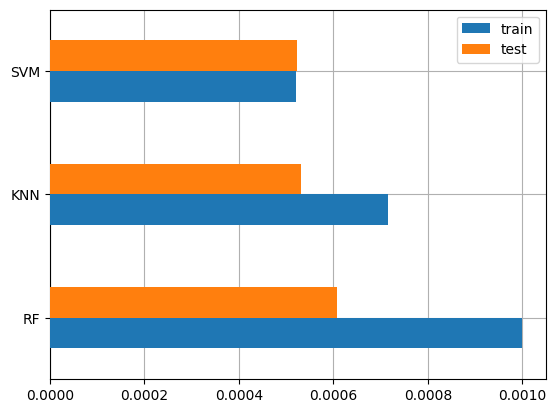

In [ ]:
fig, ax = plt.subplots()
eval.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

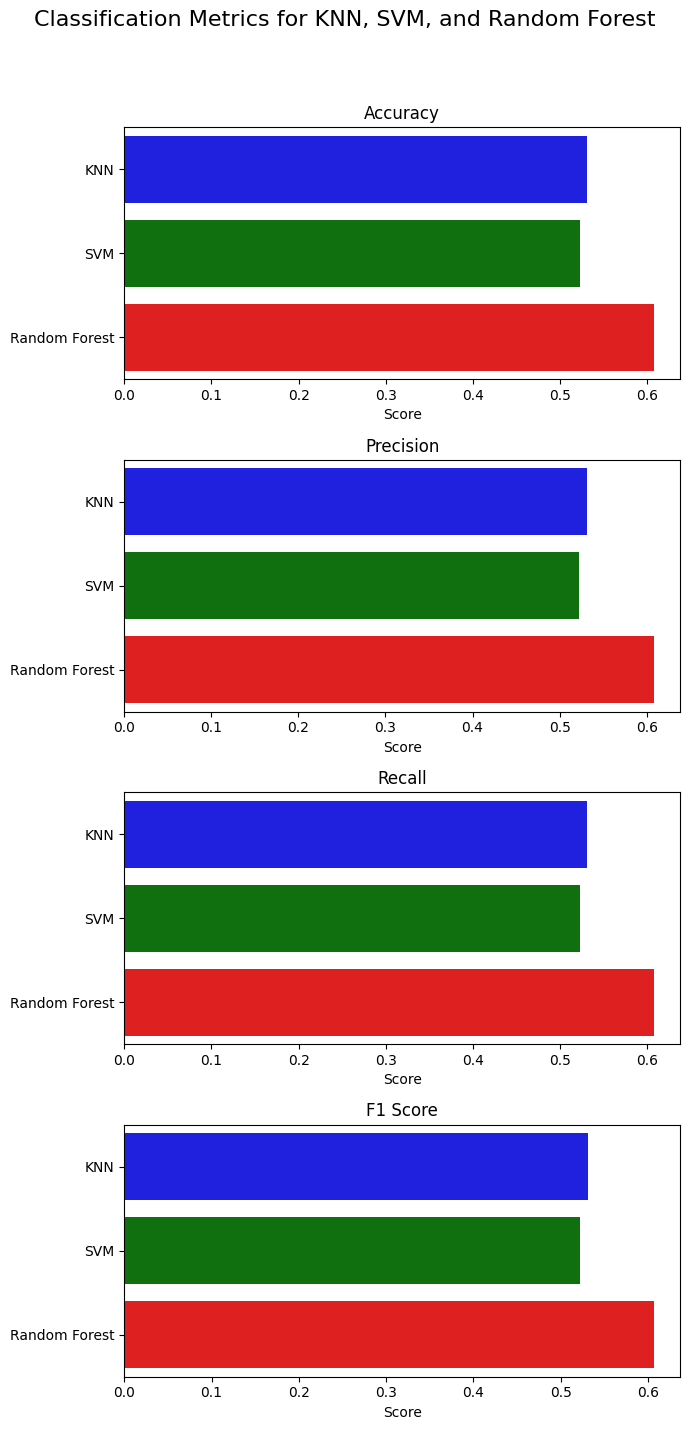

In [ ]:
y_true = y_test

models = {
    'KNN': knn_predictions,
    'SVM': svm_predictions,
    'Random Forest': rf_predictions
}

# Define a function to calculate metrics
def calculate_metrics(y_true, y_pred):
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred, average='weighted')
    recall = metrics.recall_score(y_true, y_pred, average='weighted')
    f1 = metrics.f1_score(y_true, y_pred, average='weighted')
    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Calculate metrics for each model
model_metrics = {model: calculate_metrics(y_true, predictions) for model, predictions in models.items()}

colors = ['blue', 'green', 'red']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(7, 15))
fig.suptitle('Classification Metrics for KNN, SVM, and Random Forest', fontsize=16)

# Metrics to plot
metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plotting each metric in its own subplot
for i, metric in enumerate(metrics_list):
    values = [model_metrics[model][metric] for model in models]
    sns.barplot(x=values, y=list(models.keys()), ax=axes[i], palette=colors)
    axes[i].set_title(metric)
    axes[i].set_xlabel('Score')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Berdasarkan visualisasi data diatas, terlihat bahwa baseline model dengan algoritma `Random Forest` memiliki performa yang terbaik pada `Accuracy`, `Precision`, `Recall`, dan `F1 Score`  dibandingkan dengan baseline model algoritma `KNN` dan `SVM` baik pada proses `train` maupun `test` nya.

Maka dari itu, Algoritma `Random Forest` akan digunakan ketahap selanjutnya yaitu, tuning hyperparameter.

## Hyperparameter Tuning

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
rf = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score (accuracy): {best_score}")

Fitting 3 folds for each of 225 candidates, totalling 675 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 400}
Best cross-validation score (accuracy): 0.5984355001430486


Berdasarkan hasil dari proses `GridSearch`, kombinasi parameter yang terbaik adalah:

- `max_depth`: 10
- `min_samples_leaf`: 2
- `min_samples_split`: 5,
- `n_estimators`: 400

# Evaluasi

In [ ]:
# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")


Test Accuracy: 0.6101694915254238


Hasil diatas menujukkan bahwa `Accuracy` model menggunakan dataset `test` sebesar 61%. Hasilnya lebih besar dibandingkan dengan baseline model dari `Random Forest` tanpa hyperparameter tuning.

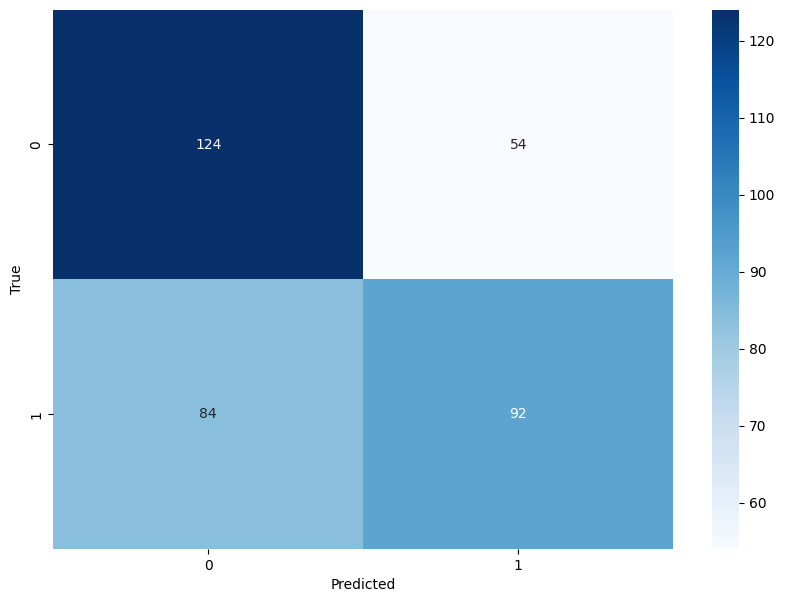

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10,7))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d',  cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Berdasarkan visualisasi data diatas, hasilnya dapat dirincikan sebagai berikut:
- True Positive (TP): 124
- True Negative (TN): 92
- False Positive (FP): 84
- False Negative (FN): 54

In [ ]:
# Calculate and print the evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

# For a more comprehensive report
classification_report = metrics.classification_report(y_test, y_pred)
print(f"Classification Report :\n{classification_report}")

Classification Report :
              precision    recall  f1-score   support

           0       0.60      0.70      0.64       178
           1       0.63      0.52      0.57       176

    accuracy                           0.61       354
   macro avg       0.61      0.61      0.61       354
weighted avg       0.61      0.61      0.61       354



Berdasarkan output diatas, berikut ini adalah hasil akhir dari model yang dibangun dengan algoritma `Random Forest` dengan hyperparameter tuning:
- `Accuracy` : 0.61
- `Precision`: 0.61
- `Recall`: 0.61
- `F1-Score`: 0.61